# Your First RNN

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras import Sequential, Input, layers
from sklearn.model_selection import train_test_split

## (1) The Dataset

In [3]:
X = np.load('../data/rnn/X.npy')
y = np.load('../data/rnn/y.npy')

X.shape, y.shape

((25000, 10, 3), (25000,))

In [6]:
employee_0 = pd.DataFrame(X[0], columns=['salary', 'responsability', 'company_size'])
round(employee_0)

,salary,responsability,company_size
0,1.0,11.0,102.0
1,0.0,11.0,102.0
2,1.0,11.0,102.0
3,1.0,11.0,130.0
4,1.0,11.0,130.0
5,1.0,11.0,130.0
6,1.0,32.0,108.0
7,5.0,32.0,108.0
8,5.0,33.0,108.0
9,5.0,39.0,108.0


In [8]:
# For example, the first employee earns 6.499 k USD per month during the 11th year at the company
y[0]

np.float64(6.499)

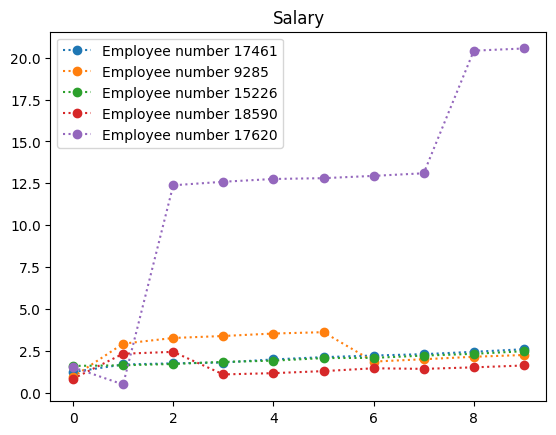

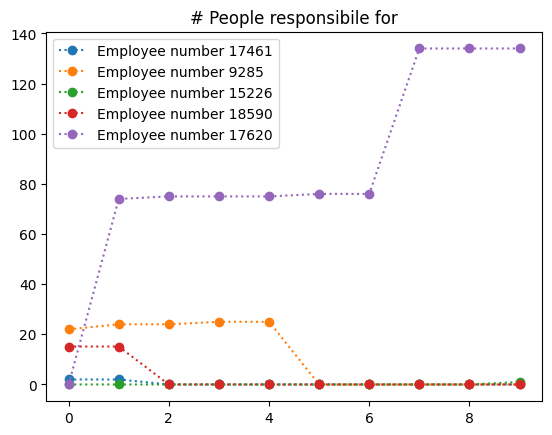

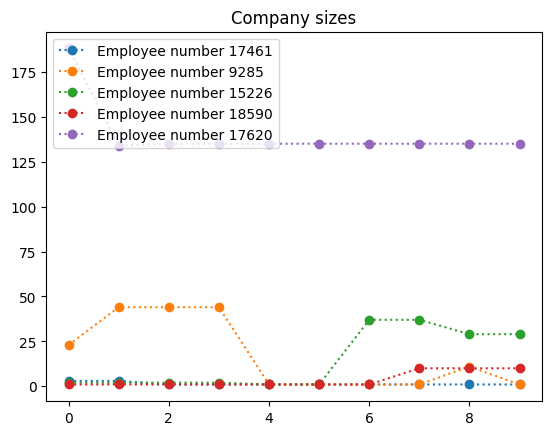

In [10]:
number_of_employees = len(X)

# Choosing random employees
number_of_randomly_selected_employees = 5

random_selection = np.random.randint(0, number_of_employees, number_of_randomly_selected_employees)

# Plotting data for the selected employees
plt.title('Salary')
for r in random_selection:
    plt.plot(X[r, :, 0],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

plt.title('# People responsibile for')
for r in random_selection:
    plt.plot(X[r, :, 1],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

plt.title('Company sizes')
for r in random_selection:
    plt.plot(X[r, :, 2],label=f"Employee number {r}",linestyle=":",marker="o")
    plt.legend(loc='upper left')
plt.show()

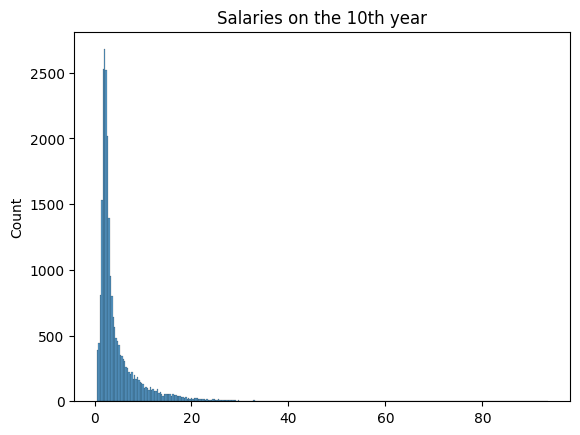

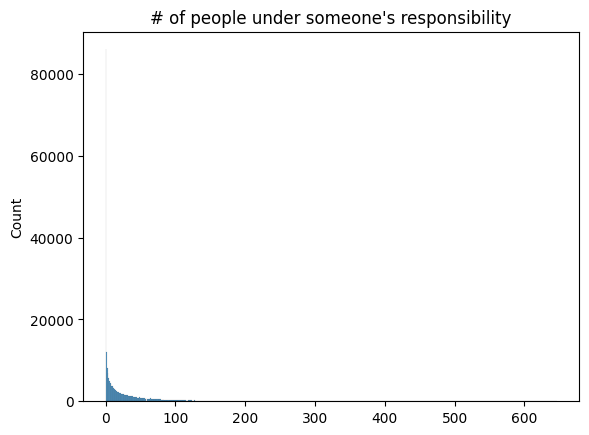

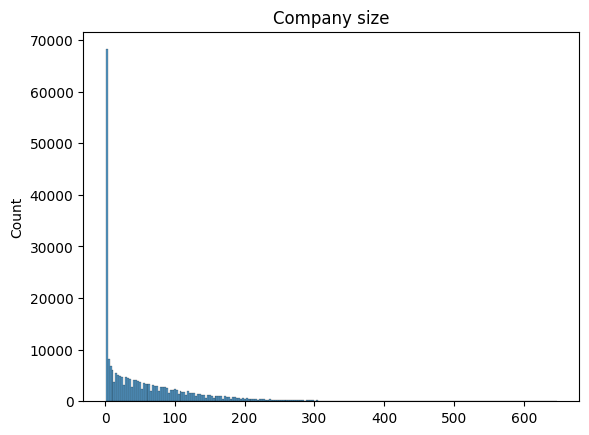

In [12]:
plt.title("Salaries on the 10th year")
sns.histplot(X[:, -1, 0].flatten()) # all the employees, last year, feature #0 = salaries
plt.show()

plt.title("# of people under someone's responsibility")
sns.histplot(X[:, :, 1].flatten()) # all the employees, all the years, feature #1 = responsabilities
plt.show()

plt.title("Company size")
sns.histplot(X[:, :, 2].flatten()) # all the employees, all the years, feature #2 = company size
plt.show()


In [15]:
# Hold-out method

# We are train_test_splitting the 25 000 employees!
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## (2) A Simple RNN

In [19]:
def init_compile_model():
    # Adapting a Normalization Layer to X_train
    normalizer = layers.Normalization()
    normalizer.adapt(X_train)

    # Building the RNN architecture
    model = Sequential()
    model.add(Input(shape=X_train.shape[1:]))
    model.add(normalizer)

    model.add(layers.SimpleRNN(units=20, activation='tanh'))

    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

    return model

model = init_compile_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_1 (Normalization) │ (None, 10, 3)          │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 20)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 708 (2.77 KB)

 Trainable params: 701 (2.74 KB)

 Non-trainable params: 7 (32.00 B)

In [21]:
es = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=100, callbacks=[es], verbose=1)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 22.4030 - mae: 2.0775 - val_loss: 6.4698 - val_mae: 0.9077
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.1671 - mae: 0.6508 - val_loss: 2.2512 - val_mae: 0.5215
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.0976 - mae: 0.4844 - val_loss: 1.4089 - val_mae: 0.4554
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4669 - mae: 0.4324 - val_loss: 1.0175 - val_mae: 0.3872
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1767 - mae: 0.4079 - val_loss: 0.8720 - val_mae: 0.3369
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0275 - mae: 0.3977 - val_loss: 0.8436 - val_mae: 0.4020
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9381 - mae: 0.3882 - val_loss: 1.0010 - val_mae: 0.6536
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8618 - mae: 0.3863 - val_loss: 0.8470 - val_mae: 0.5190
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms

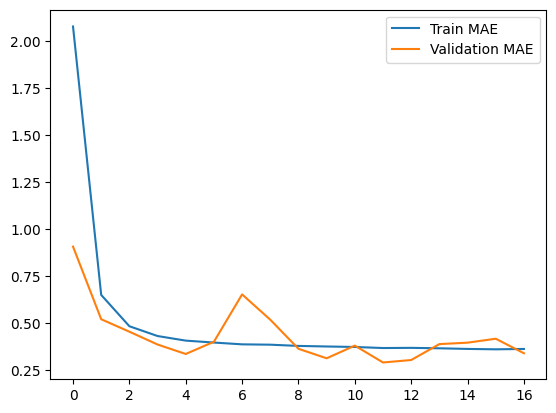

In [22]:
plt.plot(history.history["mae"], label = "Train MAE")
plt.plot(history.history["val_mae"], label = "Validation MAE")
plt.legend()

In [23]:
model_mae = model.evaluate(X_test, y_test, verbose=0)

print(f'Model Mean Absolute Error {model_mae[1]:.4f}')

Model Mean Absolute Error 0.2835


## (3) Baseline comparison

In [24]:
# Using the last salary in X to predict the next salary
y_test_baseline = X_test[:, -1, 0]
mae_baseline = np.mean(np.abs(y_test - y_test_baseline))

print(f'Baseline MAE = {mae_baseline:.3f}')
print("vs.")
print(f'RNN MAE = {model_mae[1]:.3f}')

Baseline MAE = 0.578
vs.
RNN MAE = 0.283


## (4) LSTM: Long-Short Term Memory

In [25]:
def init_compile_lstm():
    # Adapting a Normalization Layer to X_train
    normalizer = layers.Normalization()
    normalizer.adapt(X_train)

    # Building the RNN architecture
    lstm = Sequential()
    lstm.add(Input(shape=X_train.shape[1:]))
    lstm.add(normalizer)

    lstm.add(layers.LSTM(units=20, activation='tanh'))

    lstm.add(layers.Dense(10, activation='relu'))
    lstm.add(layers.Dense(1, activation='linear'))

    lstm.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

    return lstm

lstm = init_compile_model()
lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization) │ (None, 10, 3)          │             7 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 20)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 708 (2.77 KB)

 Trainable params: 701 (2.74 KB)

 Non-trainable params: 7 (32.00 B)

In [26]:
es = EarlyStopping(patience=5, restore_best_weights=True)

history_lstm = lstm.fit(X_train, y_train, validation_split=0.2, batch_size=32, epochs=100, callbacks=[es], verbose=1)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 24.2485 - mae: 2.1247 - val_loss: 6.8248 - val_mae: 0.8909
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2766 - mae: 0.6077 - val_loss: 2.0344 - val_mae: 0.4258
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9805 - mae: 0.4198 - val_loss: 1.2217 - val_mae: 0.3554
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3458 - mae: 0.3850 - val_loss: 0.9293 - val_mae: 0.3272
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0862 - mae: 0.3629 - val_loss: 0.8002 - val_mae: 0.3194
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9550 - mae: 0.3582 - val_loss: 0.7370 - val_mae: 0.3535
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8589 - mae: 0.3525 - val_loss: 0.7489 - val_mae: 0.3617
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.8005 - mae: 0.3484 - val_loss: 0.6918 - val_mae: 0.2845
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms

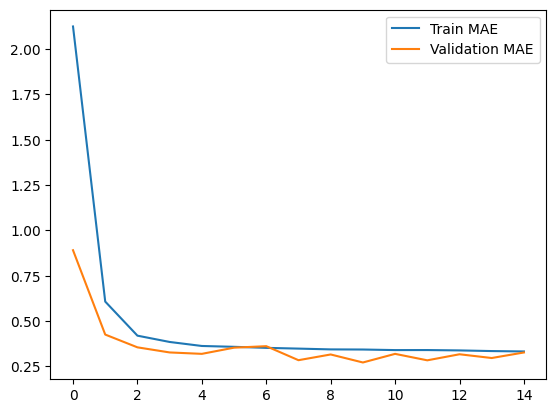

In [27]:
plt.plot(history_lstm.history["mae"], label = "Train MAE")
plt.plot(history_lstm.history["val_mae"], label = "Validation MAE")
plt.legend()

In [29]:
lstm_mae = lstm.evaluate(X_test, y_test, verbose=0)

print(f'Baseline MAE = {mae_baseline:.3f}')
print(f'SimpleRNN Mean Absolute Error {model_mae[1]:.4f}')
print(f'LSTM Mean Absolute Error {lstm_mae[1]:.4f}')

Baseline MAE = 0.578
SimpleRNN Mean Absolute Error 0.2835
LSTM Mean Absolute Error 0.2641
